# 
Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [1]:
# Code source: Dardouri Othmane

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [2]:
df = pd.read_csv(os.getcwd()+"/power_demand_vs_temperature.csv",index_col="date")

In [3]:
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


Set the date column as index

### Explore the dataset and check for missing values


In [4]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [5]:
df.isnull().any(axis=1).sum()

np.int64(0)

### Create X and y 

In [47]:
X = df["temp"]
y = df["demand"]
X.shape,y.shape

((1096,), (1096,))

### Plot the distribution



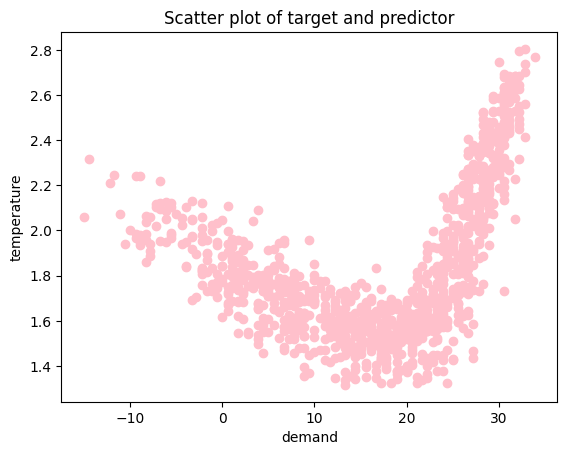

In [27]:
plt.scatter(X,y,color="pink")
plt.title("Scatter plot of target and predictor")
plt.xlabel("demand")
plt.ylabel("temperature")
plt.show()

### Divide the dataset in train and test splits

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state,test_size=0.3)
X_train, X_test = X_train.to_frame(), X_test.to_frame()
X_train.shape,y_test.shape

((767, 1), (329,))

### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [10]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm


## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [29]:
linear_estimator = LinearRegression()
linear_estimator.fit(X_train,y_train)
y_pred_linear = linear_estimator.predict(X_test)
mse_linear = mean_squared_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test,y_pred_linear)
print(f"MSE for linear regression is :{mse_linear} while r2 score is: {r2_linear}")

MSE for linear regression is :0.10165083485105061 while r2 score is: 0.16809034828105496


In [11]:
linear_estimator = LinearRegression()
linear_estimator.fit(X_train,y_train)
y_pred_linear = linear_estimator.predict(X_test)
mse_linear = mean_squared_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test,y_pred_linear)

 Mean squared error: 	0.10016
 r2 score: 		0.1803
 f-statistic: 		53.273
 p-value: 		2.2197e-12


#### Visualize the prediction of the model 

In [24]:
min(df["temp"],max)

1.316033

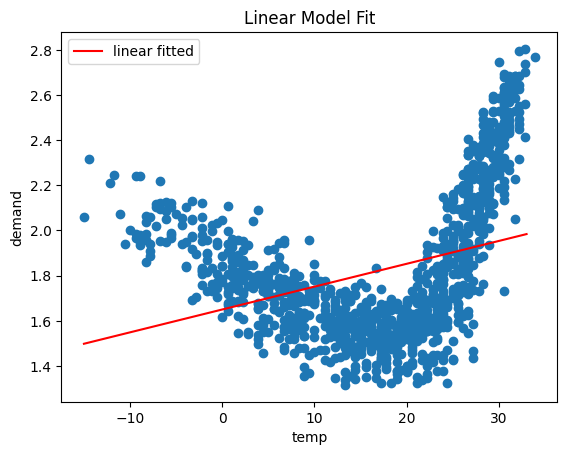

In [37]:
x = np.arange(min(df["temp"]),max(df["temp"]))
m = linear_estimator.coef_
b = linear_estimator.intercept_
y_line = m*x + b           
plt.plot(x,y_line,label="linear fitted",color="red")
plt.scatter(X,y)
plt.title("Linear Model Fit")
plt.xlabel("temp")
plt.ylabel("demand")
plt.legend()
plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [43]:
trans = PolynomialFeatures(degree=2, include_bias=False)
X_train_2 = trans.fit_transform(X_train)
X_test_2 = trans.transform(X_test)
estimator_2 = LinearRegression()
estimator_2.fit(X_train_2,y_train)
y_pred_2 = estimator_2.predict(X_test_2)
mse_2 = mean_squared_error(y_test,y_pred_2)
r2_2 = r2_score(y_test,y_pred_2)
print(f"MSE for linear regression is :{mse_2} while r2 score is: {r2_2}")

MSE for linear regression is :0.03345625006863745 while r2 score is: 0.7261943063900528


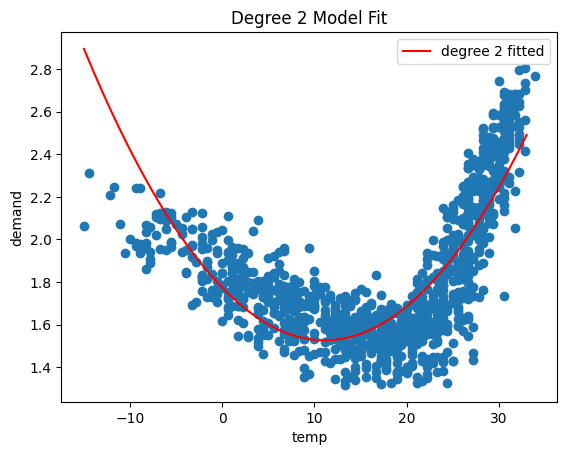

In [49]:
estimator_2.coef_
x_2 = x**2
y_2 = estimator_2.coef_[1]*x_2 + estimator_2.coef_[0]*x + estimator_2.intercept_
plt.plot(x,y_2,label="degree 2 fitted",color="red")
plt.scatter(X,y)
plt.title("Degree 2 Model Fit")
plt.xlabel("temp")
plt.ylabel("demand")
plt.legend()
plt.show()

## Third experiment

#### Polynomial degree = 3

In [51]:
trans_2 = PolynomialFeatures(degree=3, include_bias=False)
X_train_3 = trans_2.fit_transform(X_train)
X_test_3 = trans_2.transform(X_test)
estimator_3 = LinearRegression()
estimator_3.fit(X_train_3,y_train)
y_pred_3 = estimator_3.predict(X_test_3)
mse_3 = mean_squared_error(y_test,y_pred_3)
r2_3 = r2_score(y_test,y_pred_3)
print(f"MSE for linear regression is :{mse_3} while r2 score is: {r2_3}")

MSE for linear regression is :0.021749417017788337 while r2 score is: 0.8220029381670013


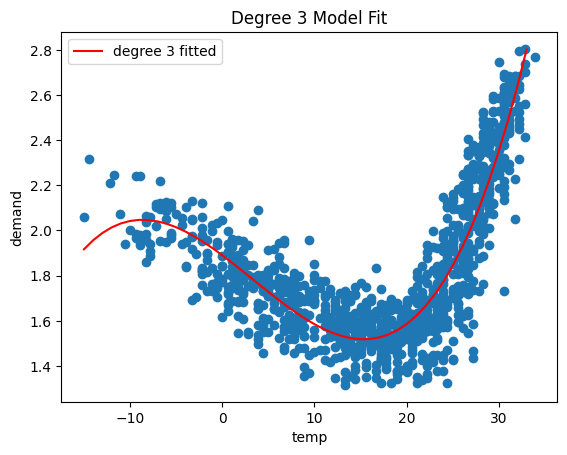

In [53]:
x_3 = x_2*x
y_3 = estimator_3.coef_[2]*x_3 + estimator_3.coef_[1]*x_2 + estimator_3.coef_[0]*x + estimator_3.intercept_
plt.plot(x,y_3,label="degree 3 fitted",color="red")
plt.scatter(X,y)
plt.title("Degree 3 Model Fit")
plt.xlabel("temp")
plt.ylabel("demand")
plt.legend()
plt.show()

## Fourth experiment
### Polynomial degree = 4

In [54]:
trans_3 = PolynomialFeatures(degree=4, include_bias=False)
X_train_4 = trans_3.fit_transform(X_train)
X_test_4 = trans_3.transform(X_test)
estimator_4 = LinearRegression()
estimator_4.fit(X_train_4,y_train)
y_pred_4 = estimator_4.predict(X_test_4)
mse_4 = mean_squared_error(y_test,y_pred_4)
r2_4 = r2_score(y_test,y_pred_4)
print(f"MSE for linear regression is :{mse_4} while r2 score is: {r2_4}")


MSE for linear regression is :0.021333874235340153 while r2 score is: 0.825403737107092


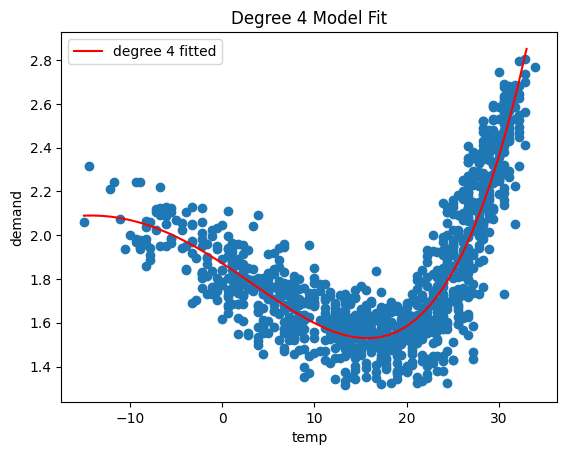

In [55]:
x_4 = x_3*x
y_4 = estimator_4.coef_[3]*x_4 + estimator_4.coef_[2]*x_3 + estimator_4.coef_[1]*x_2 + estimator_4.coef_[0]*x + estimator_4.intercept_
plt.plot(x,y_4,label="degree 4 fitted",color="red")
plt.scatter(X,y)
plt.title("Degree 4 Model Fit")
plt.xlabel("temp")
plt.ylabel("demand")
plt.legend()
plt.show()

## Compare the performance of the four models

In [62]:
result = {"linear":[mse_linear,r2_linear],
          "non linear degree = 2":[mse_2,r2_2],
          "non linear degree = 3":[mse_3,r2_3],
          "non linear degree = 4":[mse_4,r2_4],
         }
          
results = pd.DataFrame(result,index=["rmse","r2"])
results = results.style.format("{:.4f}")
display(results)

,linear,non linear degree = 2,non linear degree = 3,non linear degree = 4
rmse,0.1017,0.0335,0.0217,0.0213
r2,0.1681,0.7262,0.8220,0.8254
